In [1]:
from main import test_classificator
import numpy as np

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy.stats import kde

In [2]:
result = test_classificator()

INFO - ToyConveyor
100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [04:23<00:00,  4.55it/s]
INFO - ToyConveyor
100%|██████████████████████████████████████████████████████████████████████████████| 1154/1154 [04:11<00:00,  4.59it/s]
INFO - ToyConveyor
100%|██████████████████████████████████████████████████████████████████████████████| 1155/1155 [04:11<00:00,  4.60it/s]
INFO - ToyCar
100%|████████████████████████████████████████████████████████████████████████████████| 614/614 [02:19<00:00,  4.41it/s]
INFO - ToyCar
100%|████████████████████████████████████████████████████████████████████████████████| 615/615 [02:19<00:00,  4.39it/s]
INFO - ToyCar
100%|████████████████████████████████████████████████████████████████████████████████| 615/615 [02:21<00:00,  4.35it/s]
INFO - ToyCar
100%|████████████████████████████████████████████████████████████████████████████████| 615/615 [02:20<00:00,  4.39it/s]
INFO - valve
100%|█████████████████████████████

In [3]:
for machine_name, lmachine in result.items():
    print(f"*{machine_name}")
    total_auc = 0
    for machine in lmachine:
        auc = machine.auc_score
        total_auc += auc
        print(f"\t auc {machine.id_m}: {auc:.3f}")
    print(f"\t auc average: {total_auc/len(lmachine):.3f}")
        

*ToyConveyor
	 auc 01: 0.829
	 auc 03: 0.761
	 auc 02: 0.633
	 auc average: 0.741
*ToyCar
	 auc 01: 0.754
	 auc 03: 0.883
	 auc 02: 0.786
	 auc 04: 0.987
	 auc average: 0.853
*valve
	 auc 06: 0.792
	 auc 00: 0.981
	 auc 02: 0.828
	 auc 04: 0.956
	 auc average: 0.889
*slider
	 auc 06: 0.977
	 auc 00: 0.978
	 auc 02: 0.972
	 auc 04: 0.997
	 auc average: 0.981
*pump
	 auc 06: 0.928
	 auc 00: 0.741
	 auc 02: 0.626
	 auc 04: 0.980
	 auc average: 0.819
*fan
	 auc 06: 0.860
	 auc 00: 0.592
	 auc 02: 0.913
	 auc 04: 0.867
	 auc average: 0.808


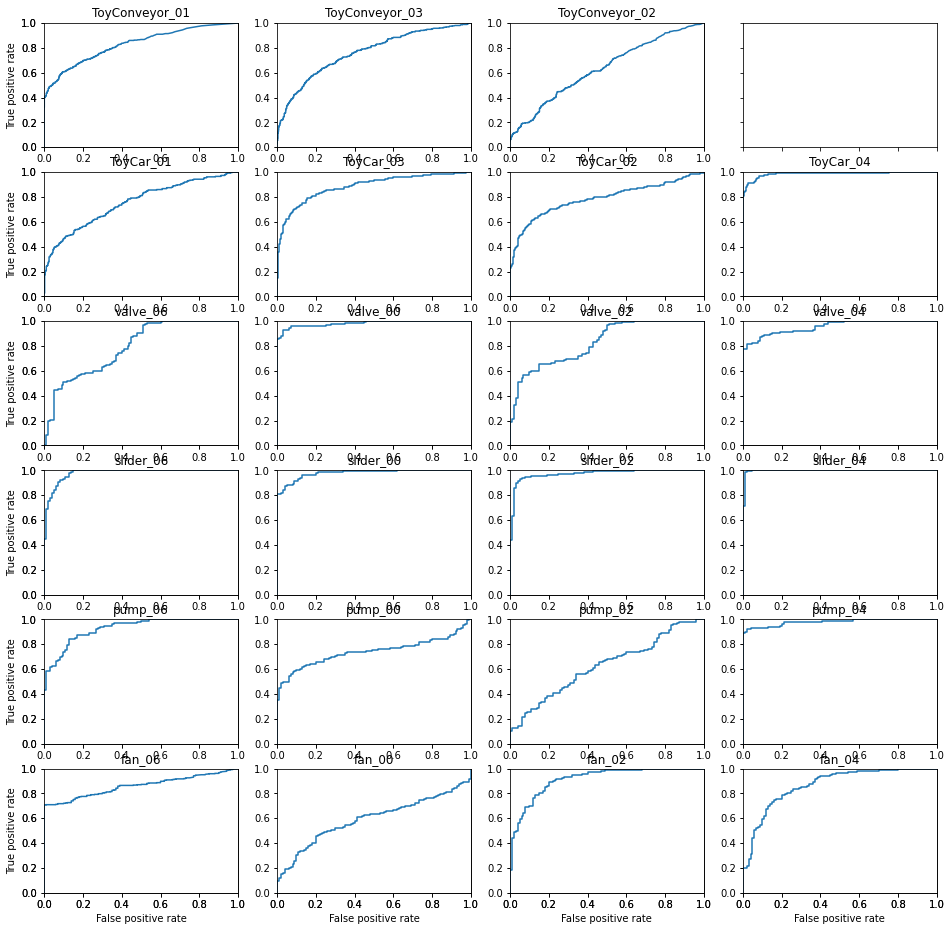

In [4]:
def plot_roc_curve(fpr, tpr, title):
    plt.plot(fpr, tpr)
    plt.axis([0, 1, 0, 1])
    plt.title(title)

fig, axes = plt.subplots(6, 4, sharex=True, sharey=True, figsize=(16,16))
i_graph = 1
for machine_name, lmachine in result.items():
    for machine in lmachine:
        fig.add_subplot(6, 4, i_graph)
        fpr, tpr, threshold = roc_curve(machine.y_true, machine.y_pred)
        plot_roc_curve(fpr, tpr, f"{machine_name}_{machine.id_m}")
        i_graph += 1
        if i_graph == 4:
            i_graph += 1 
        
for ax in axes.flat:
    ax.set(xlabel='False positive rate', ylabel='True positive rate')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()


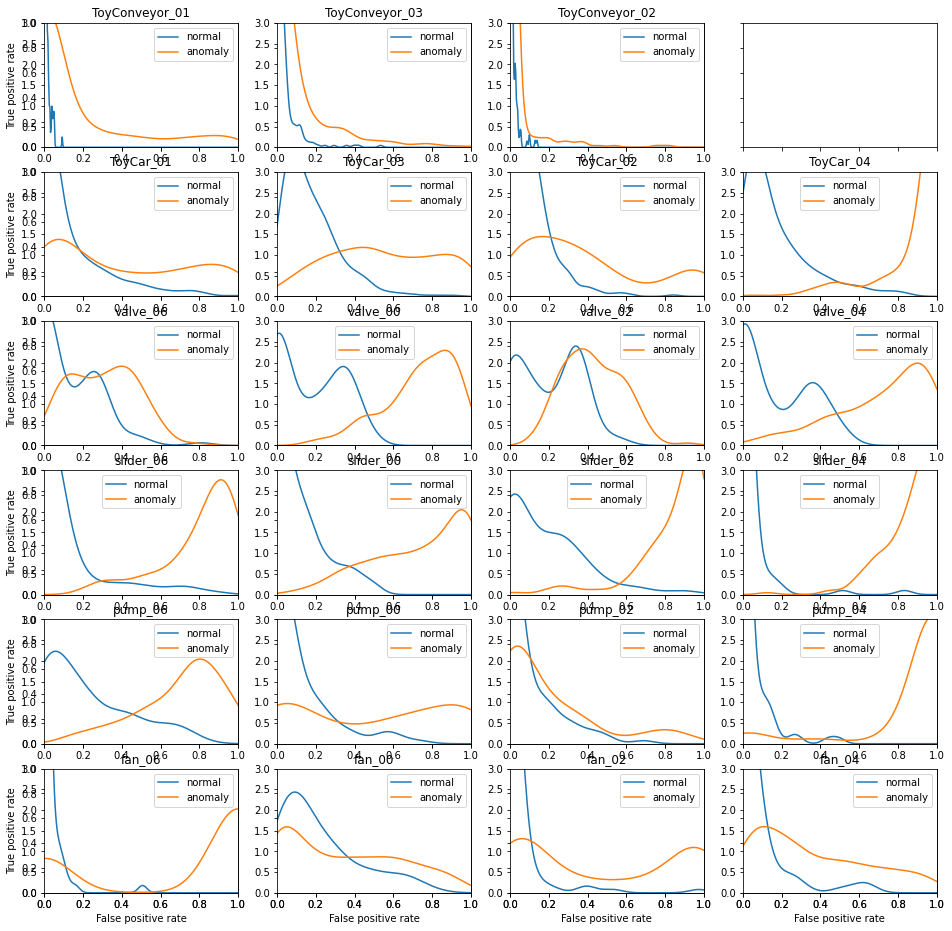

In [5]:
fig, axes = plt.subplots(6, 4, sharex=True, figsize=(16,16))
i_graph = 1
for machine_name, lmachine in result.items():
    for machine in lmachine:
        fig.add_subplot(6, 4, i_graph)
        y_0 = [x for i, x in enumerate(machine.y_pred) if machine.y_true[i]==0]
        y_1 = [x for i, x in enumerate(machine.y_pred) if machine.y_true[i]==1]
        x = np.linspace(0,1,300)
        y_0 = kde.gaussian_kde(y_0)(x)
        plt.plot(x, y_0, label="normal")
        y_1 = kde.gaussian_kde(y_1)(x)
        plt.plot(x, y_1, label="anomaly")
        plt.xlim([0, 1])
        plt.ylim([0, 3])
        plt.legend()
        plt.title(f"{machine_name}_{machine.id_m}")
        i_graph += 1
        if i_graph == 4:
            i_graph += 1
        
for ax in axes.flat:
    ax.set(xlabel='False positive rate', ylabel='True positive rate')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
    


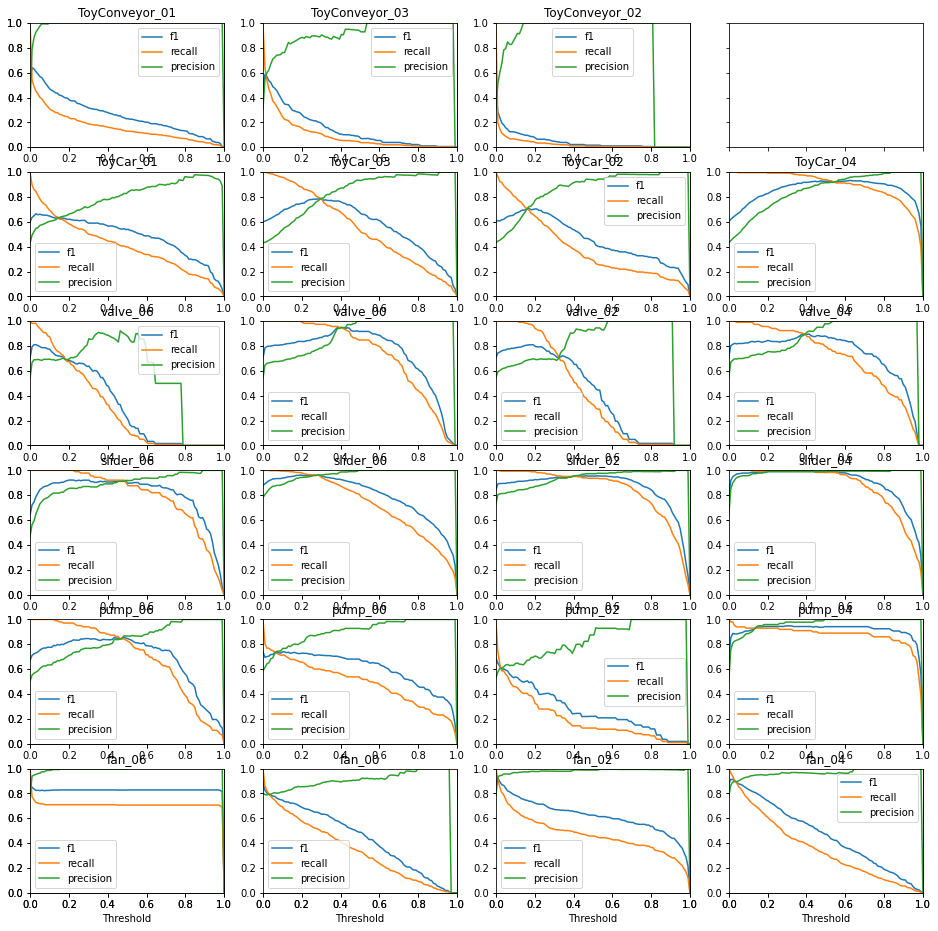

In [6]:
fig, axes = plt.subplots(6, 4, sharex=True, figsize=(16,16))
i_graph = 1
for machine_name, lmachine in result.items():
    for machine in lmachine:
        fig.add_subplot(6, 4, i_graph)
        x, y_f1 = machine.f1_curve()
        x, y_recall = machine.recall_curve()
        x, y_preci = machine.precision_curve()
        plt.plot(x, y_f1, label="f1")
        plt.plot(x, y_recall, label="recall")
        plt.plot(x, y_preci, label="precision")
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.legend()
        plt.title(f"{machine_name}_{machine.id_m}")
        i_graph += 1
        if i_graph == 4:
            i_graph += 1
        
for ax in axes.flat:
    ax.set(xlabel='Threshold', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()

In [7]:
for machine_name, lmachine in result.items():
    print(f"*{machine_name}")
    for machine in lmachine:
        machine.find_threshold()
        print(f"\t threshold {machine.id_m}: {machine.threshold:.3f}")

*ToyConveyor
	 threshold 01: 0.030
	 threshold 03: 0.303
	 threshold 02: 0.111
*ToyCar
	 threshold 01: 0.667
	 threshold 03: 0.444
	 threshold 02: 0.394
	 threshold 04: 0.626
*valve
	 threshold 06: 0.354
	 threshold 00: 0.384
	 threshold 02: 0.384
	 threshold 04: 0.414
*slider
	 threshold 06: 0.455
	 threshold 00: 0.192
	 threshold 02: 0.465
	 threshold 04: 0.202
*pump
	 threshold 06: 0.646
	 threshold 00: 0.354
	 threshold 02: 0.515
	 threshold 04: 0.293
*fan
	 threshold 06: 0.010
	 threshold 00: 0.354
	 threshold 02: 0.010
	 threshold 04: 0.061
